In [94]:
# Initialize PaddleOCR instance
from paddleocr import PaddleOCR
ocr = PaddleOCR(
    use_doc_orientation_classify=False,
    use_doc_unwarping=False,
    use_textline_orientation=False,
    lang='fr')

# Run OCR inference on a sample image 
result = ocr.predict(
    input="test.jpg")  # Change to your image path

# Visualize the results and save the JSON results
for res in result:
    res.print()
    res.save_to_img("output")
    res.save_to_json("output")

MKL-DNN is not available. Using `paddle` instead.
Creating model: ('PP-OCRv5_server_det', None)
Using official model (PP-OCRv5_server_det), the model files will be automatically downloaded and saved in /Users/teo/.paddlex/official_models.
Creating model: ('latin_PP-OCRv5_mobile_rec', None)
Using official model (latin_PP-OCRv5_mobile_rec), the model files will be automatically downloaded and saved in /Users/teo/.paddlex/official_models.


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

Resized image size (14175x800) exceeds max_side_limit of 4000. Resizing to fit within limit.
{'res': {'input_path': 'test.jpg', 'page_index': None, 'model_settings': {'use_doc_preprocessor': True, 'use_textline_orientation': False}, 'doc_preprocessor_res': {'input_path': None, 'page_index': None, 'model_settings': {'use_doc_orientation_classify': False, 'use_doc_unwarping': False}, 'angle': -1}, 'dt_polys': array([[[  182,  3029],
        ...,
        [  177,  3082]],

       ...,

       [[    3, 13424],
        ...,
        [    5, 13474]]], shape=(19, 4, 2), dtype=int16), 'text_det_params': {'limit_side_len': 64, 'limit_type': 'min', 'thresh': 0.3, 'max_side_limit': 4000, 'box_thresh': 0.6, 'unclip_ratio': 1.5}, 'text_type': 'general', 'textline_orientation_angles': array([-1, ..., -1], shape=(19,)), 'text_rec_score_thresh': 0.0, 'rec_texts': ["J'ÉTAIS", 'POURTANT...', 'EN PLEIN', 'COMBAT AVEC CANE', 'CORSO...', 'MON SEPTIÈME', 'CROC A ÉTÉ DÉTRUIT', 'PAR SON NEUVIÈME,', "ET JE L'AI"

In [95]:
result[0]

{'input_path': 'test.jpg',
 'page_index': None,
 'doc_preprocessor_res': {'input_path': None,
  'page_index': None,
  'input_img': array([[[0, ..., 0],
          ...,
          [0, ..., 0]],
  
         ...,
  
         [[0, ..., 0],
          ...,
          [1, ..., 1]]], shape=(14175, 800, 3), dtype=uint8),
  'model_settings': {'use_doc_orientation_classify': False,
   'use_doc_unwarping': False},
  'angle': -1,
  'rot_img': array([[[0, ..., 0],
          ...,
          [0, ..., 0]],
  
         ...,
  
         [[0, ..., 0],
          ...,
          [1, ..., 1]]], shape=(14175, 800, 3), dtype=uint8),
  'output_img': array([[[0, ..., 0],
          ...,
          [0, ..., 0]],
  
         ...,
  
         [[0, ..., 0],
          ...,
          [1, ..., 1]]], shape=(14175, 800, 3), dtype=uint8)},
 'dt_polys': [array([[ 182, 3029],
         ...,
         [ 177, 3082]], shape=(4, 2), dtype=int16),
  array([[ 143, 3090],
         ...,
         [ 143, 3129]], shape=(4, 2), dtype=int16),
  

In [ ]:
print(len(result[0]["rec_polys"]))
result[0]["rec_polys"][0][0]  
result[0]["rec_polys"][0][1]  
result[0]["rec_polys"][0][2]  
result[0]["rec_polys"][0][3][0]
result[0]["rec_polys"][0][3][1]

19


np.int16(3082)

In [86]:
x=[]
for i in range(len(result[0]["rec_polys"])):
    for j in range(len(result[0]["rec_polys"][i])):
        x.append([result[0]["rec_polys"][i][j][0],result[0]["rec_polys"][i][j][1]])

In [96]:
result[0]["rec_polys"]

[array([[ 182, 3029],
        ...,
        [ 177, 3082]], shape=(4, 2), dtype=int16),
 array([[ 143, 3090],
        ...,
        [ 143, 3129]], shape=(4, 2), dtype=int16),
 array([[ 436, 4093],
        ...,
        [ 436, 4132]], shape=(4, 2), dtype=int16),
 array([[ 364, 4136],
        ...,
        [ 364, 4171]], shape=(4, 2), dtype=int16),
 array([[ 436, 4178],
        ...,
        [ 436, 4217]], shape=(4, 2), dtype=int16),
 array([[ 214, 5631],
        ...,
        [ 214, 5670]], shape=(4, 2), dtype=int16),
 array([[ 164, 5670],
        ...,
        [ 164, 5716]], shape=(4, 2), dtype=int16),
 array([[ 179, 5720],
        ...,
        [ 179, 5755]], shape=(4, 2), dtype=int16),
 array([[ 450, 5876],
        ...,
        [ 450, 5915]], shape=(4, 2), dtype=int16),
 array([[ 411, 5918],
        ...,
        [ 411, 5957]], shape=(4, 2), dtype=int16),
 array([[ 448, 5953],
        ...,
        [ 445, 5999]], shape=(4, 2), dtype=int16),
 array([[ 243, 8477],
        ...,
        [ 207, 9077

In [236]:
import numpy as np
import networkx as nx

def cluster_rectangles(rects_points, factor=1.2):
    """
    Cluster des rectangles en fonction de leur chevauchement.

    Parameters:
    - rects_points: liste de np.array, chaque array contient 4 points (x,y) du rectangle
    - factor: float, facteur de multiplication de la taille du rectangle

    Returns:
    - clusters: liste de sets, chaque set contient les indices des rectangles du cluster
    """

    # Convertir les points en (x, y, w, h)
    rects_xywh = []
    for r in rects_points:
        x_min = r[:,0].min()
        y_min = r[:,1].min()
        w = r[:,0].max() - x_min
        h = r[:,1].max() - y_min
        rects_xywh.append({"x": x_min, "y": y_min, "w": w, "h": h})

    # Agrandir les rectangles
    rects_expanded = []
    for r in rects_xywh:
        x_new = r["x"] - (factor-1)/2 * r["w"]
        y_new = r["y"] - (factor-1)/2 * r["h"]
        w_new = r["w"] * factor
        h_new = r["h"] * factor
        rects_expanded.append({"x": x_new, "y": y_new, "w": w_new, "h": h_new})

    # Construire le graphe pour trouver les chevauchements
    G = nx.Graph()
    G.add_nodes_from(range(len(rects_expanded)))

    for i in range(len(rects_expanded)):
        for j in range(i+1, len(rects_expanded)):
            A, B = rects_expanded[i], rects_expanded[j]
            if (A["x"] < B["x"] + B["w"] and A["x"] + A["w"] > B["x"] and
                A["y"] < B["y"] + B["h"] and A["y"] + A["h"] > B["y"]):
                G.add_edge(i, j)

    # Obtenir les clusters
    clusters = list(nx.connected_components(G))
    return clusters

In [237]:
cluster_rectangles(result[0]["rec_polys"], factor=1.2)

[{0, 1},
 {2, 3, 4},
 {5, 6, 7},
 {8, 9, 10},
 {11, 12},
 {13},
 {14, 15},
 {16, 17},
 {18}]

In [238]:
def draw_clusters(rects_points, factor=1.2, dpi=600, linewidth=0.2):
    clusters = cluster_rectangles(rects_points, factor=factor)
    
    plt.figure(figsize=(12, 12), dpi=dpi)  # DPI augmenté
    ax = plt.gca()
    
    rects_xywh = []
    for r in rects_points:
        x_min = r[:,0].min()
        y_min = r[:,1].min()
        w = r[:,0].max() - x_min
        h = r[:,1].max() - y_min
        rects_xywh.append({"x": x_min, "y": y_min, "w": w, "h": h})
    
    for cluster in clusters:
        color = [random.random() for _ in range(3)]
        for idx in cluster:
            r = rects_xywh[idx]
            # Rectangle original
            ax.add_patch(plt.Rectangle((r["x"], r["y"]), r["w"], r["h"],
                                       fill=False, edgecolor=color, linewidth=linewidth))
            # Rectangle agrandi
            x_new = r["x"] - (factor-1)/2 * r["w"]
            y_new = r["y"] - (factor-1)/2 * r["h"]
            w_new = r["w"] * factor
            h_new = r["h"] * factor
            ax.add_patch(plt.Rectangle((x_new, y_new), w_new, h_new,
                                       fill=False, edgecolor=color, linestyle='--', linewidth=linewidth))
    
    all_x = [pt[0] for r in rects_points for pt in r]
    all_y = [pt[1] for r in rects_points for pt in r]
    ax.set_xlim(min(all_x) - 50, max(all_x) + 50)
    ax.set_ylim(min(all_y) - 50, max(all_y) + 50)
    ax.invert_yaxis()
    
    ax.set_aspect('equal')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Clusters de rectangles (plein = original, tireté = agrandi)')
    plt.show()


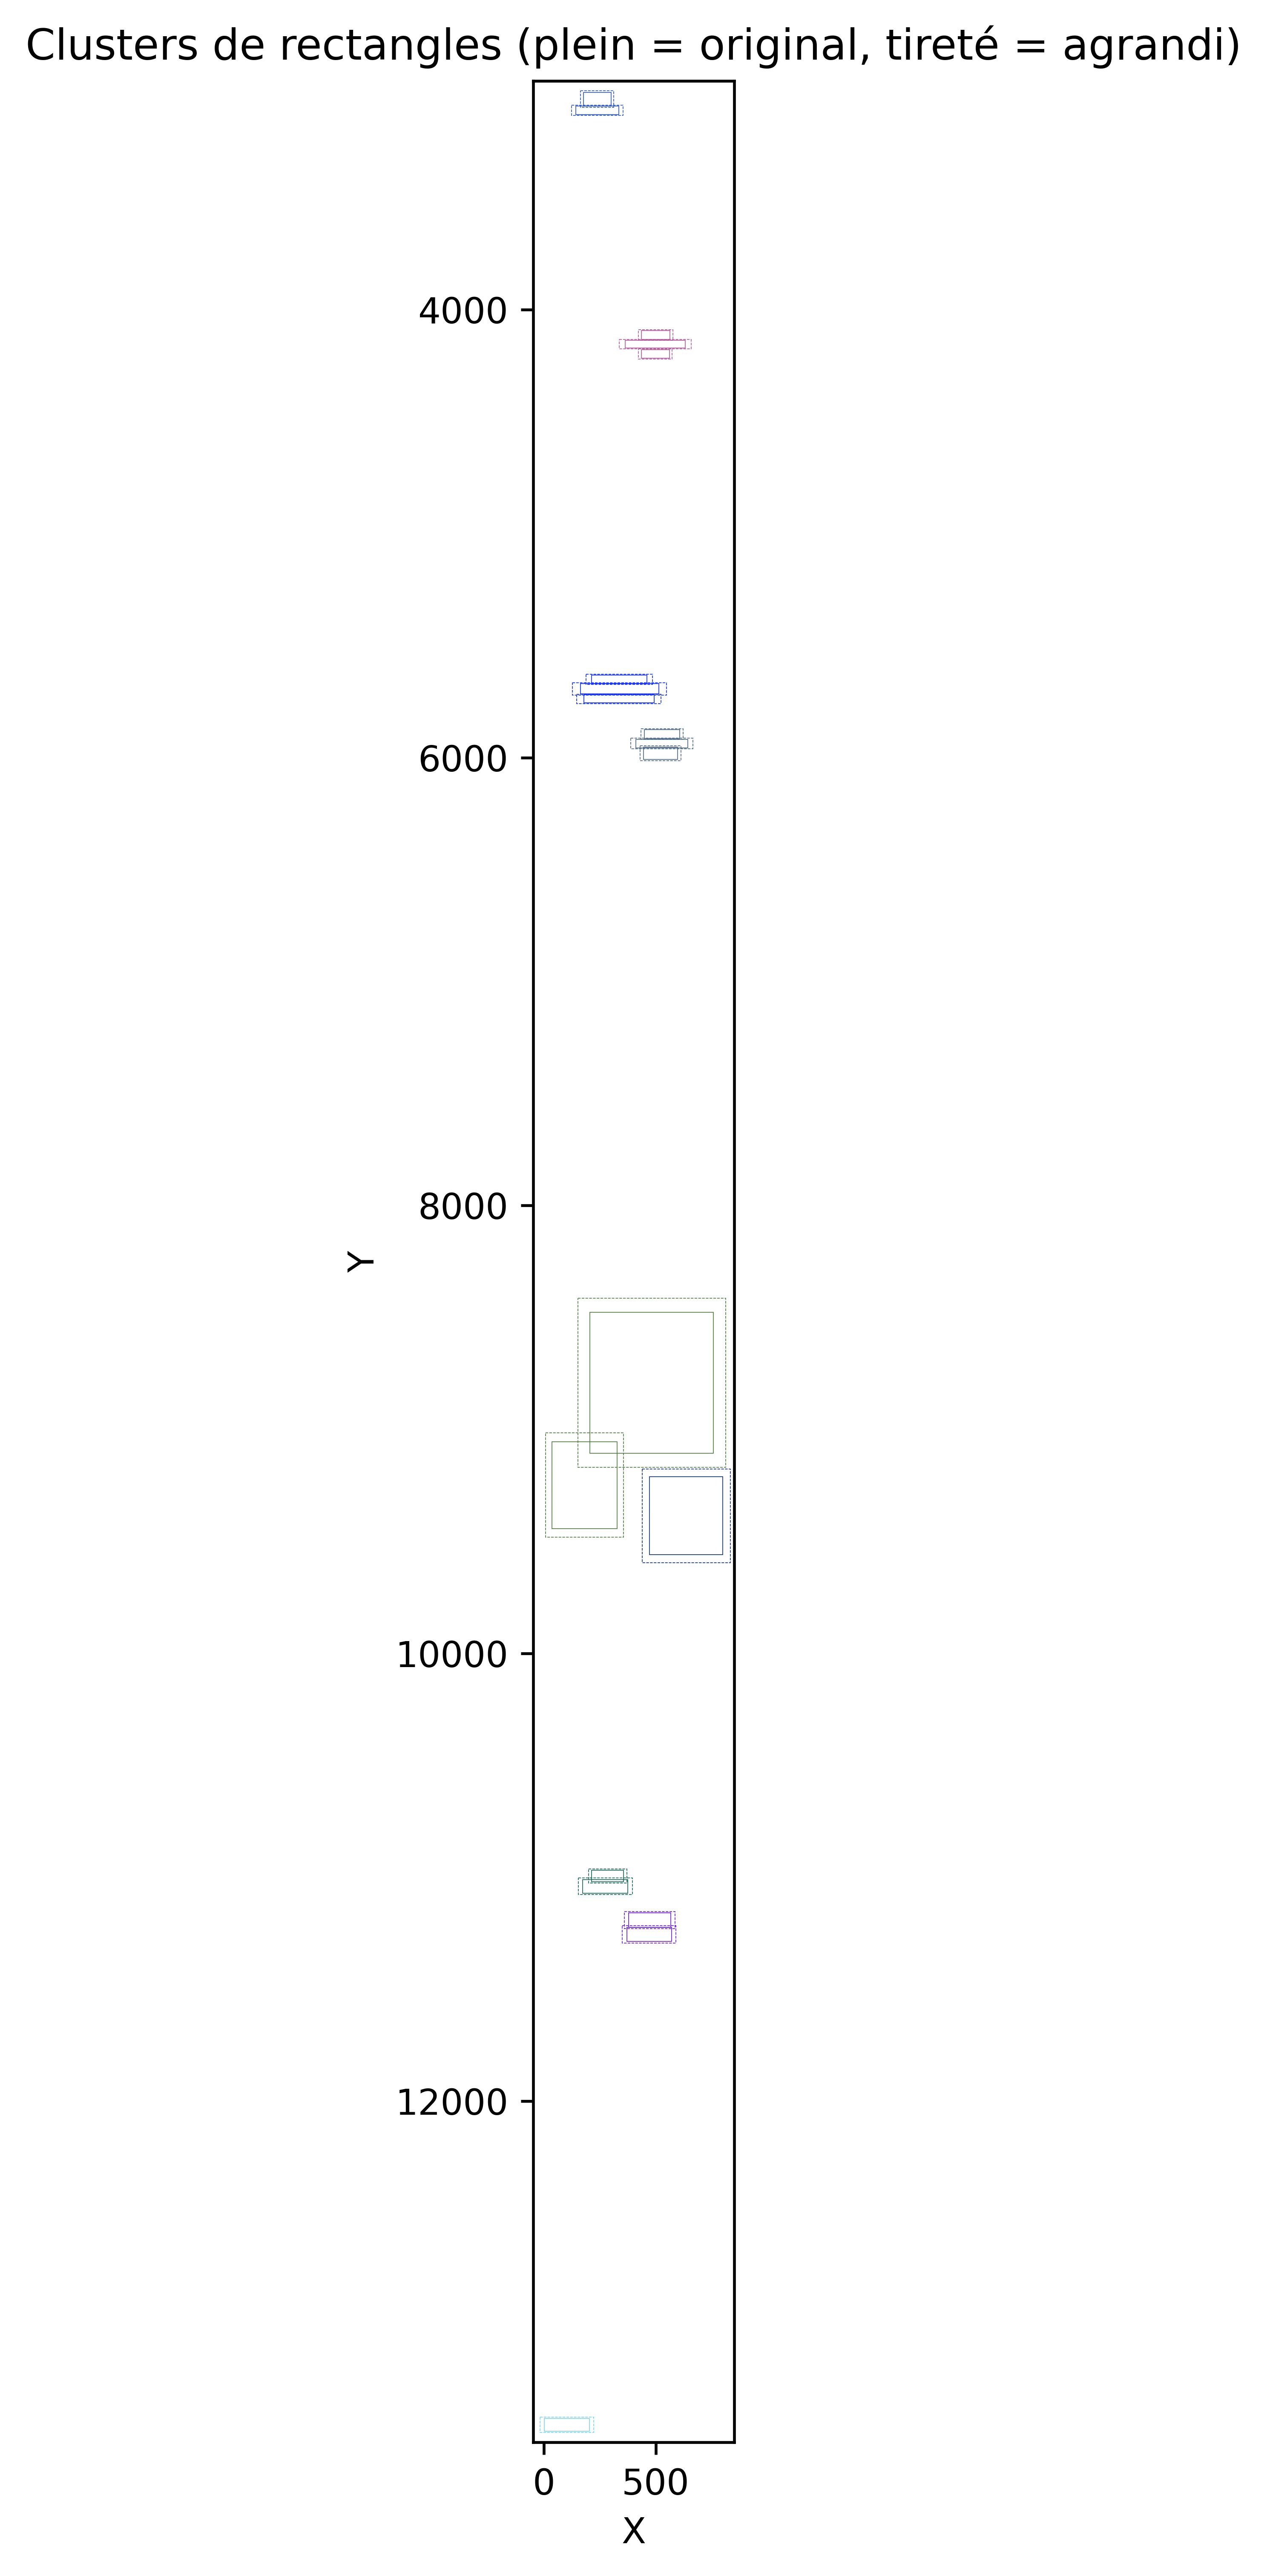

In [239]:
draw_clusters(result[0]["rec_polys"], factor=1.2)

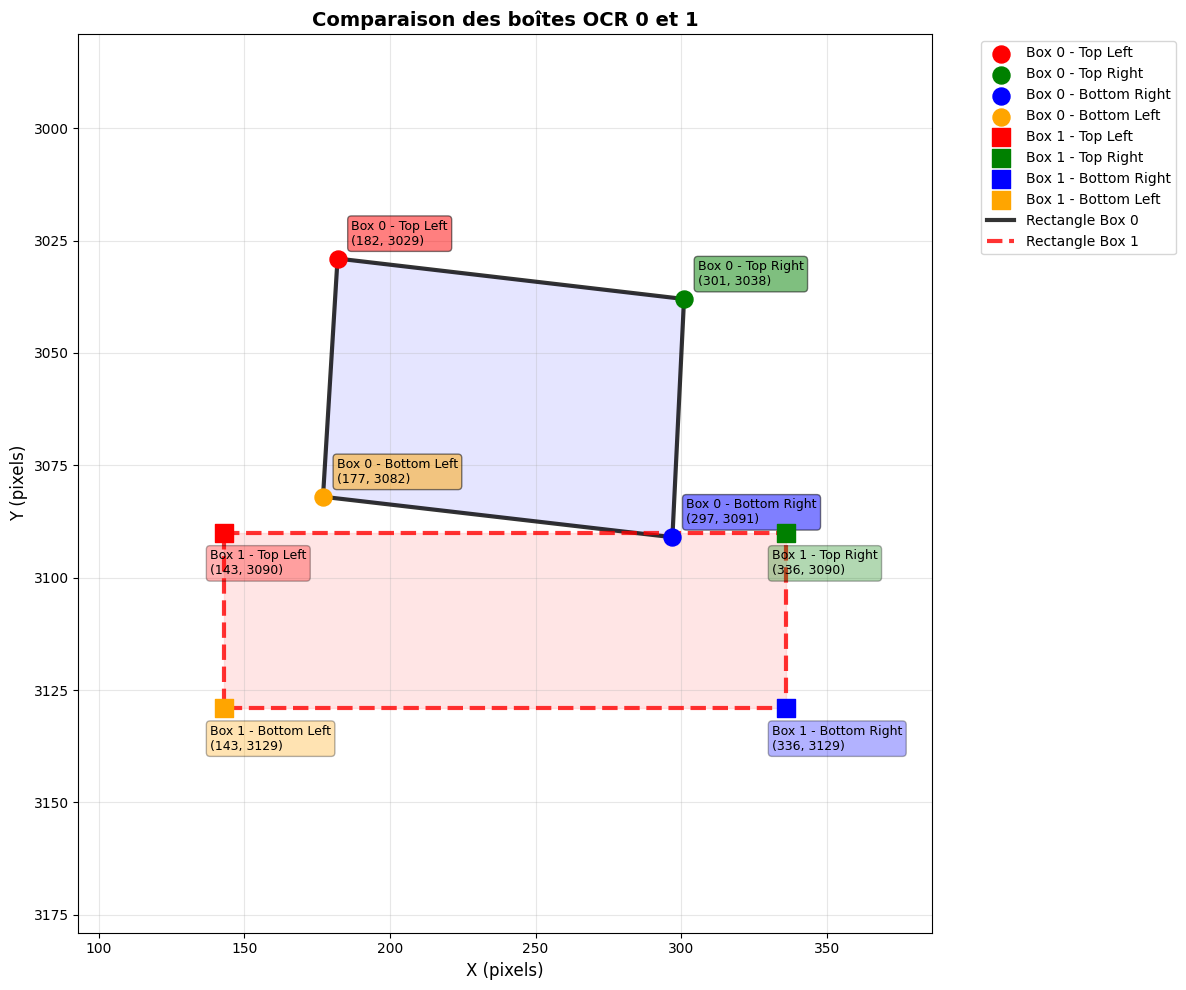

📍 Coordonnées de la Boîte 0:
  Top Left    : ( 182, 3029) - red
  Top Right   : ( 301, 3038) - green
  Bottom Right: ( 297, 3091) - blue
  Bottom Left : ( 177, 3082) - orange

📍 Coordonnées de la Boîte 1:
  Top Left    : ( 143, 3090) - red
  Top Right   : ( 336, 3090) - green
  Bottom Right: ( 336, 3129) - blue
  Bottom Left : ( 143, 3129) - orange

📏 Distances entre vecteurs:
  d1 (top-top): 74.55
  d2 (right-right): 14.56
  d3 (bottom-bottom): 73.55
  d4 (left-left): 14.87
  d5 (top-bottom1): 312.13
  d6 (bottom-top1): 313.13
  d7 (left-right1): 92.14
  d8 (right-left1): 92.09


In [172]:
import matplotlib.pyplot as plt
import numpy as np


# Créer le graphique
plt.figure(figsize=(12, 10))

# Définir les couleurs pour chaque coin
colors = ['red', 'green', 'blue', 'orange']
labels = ['Top Left', 'Top Right', 'Bottom Right', 'Bottom Left']

# Boîte 0
corners = [top_left, top_right, bottom_right, bottom_left]
for i, (corner, color, label) in enumerate(zip(corners, colors, labels)):
    plt.scatter(corner[0], corner[1], c=color, s=150, label=f'Box 0 - {label}', zorder=5, marker='o')
    plt.annotate(f'Box 0 - {label}\n({corner[0]}, {corner[1]})', 
                xy=(corner[0], corner[1]), 
                xytext=(10, 10), 
                textcoords='offset points',
                fontsize=9,
                bbox=dict(boxstyle='round,pad=0.3', facecolor=color, alpha=0.5))

# Boîte 1  
corners1 = [top_left1, top_right1, bottom_right1, bottom_left1]
for i, (corner, color, label) in enumerate(zip(corners1, colors, labels)):
    plt.scatter(corner[0], corner[1], c=color, s=150, label=f'Box 1 - {label}', zorder=5, marker='s')
    plt.annotate(f'Box 1 - {label}\n({corner[0]}, {corner[1]})', 
                xy=(corner[0], corner[1]), 
                xytext=(-10, -30), 
                textcoords='offset points',
                fontsize=9,
                bbox=dict(boxstyle='round,pad=0.3', facecolor=color, alpha=0.3))

# Dessiner le rectangle pour la boîte 0
x_coords = [top_left[0], top_right[0], bottom_right[0], bottom_left[0], top_left[0]]
y_coords = [top_left[1], top_right[1], bottom_right[1], bottom_left[1], top_left[1]]
plt.plot(x_coords, y_coords, 'k-', linewidth=3, alpha=0.8, label='Rectangle Box 0')
plt.fill(x_coords, y_coords, alpha=0.1, color='blue')

# Dessiner le rectangle pour la boîte 1
x_coords1 = [top_left1[0], top_right1[0], bottom_right1[0], bottom_left1[0], top_left1[0]]
y_coords1 = [top_left1[1], top_right1[1], bottom_right1[1], bottom_left1[1], top_left1[1]]
plt.plot(x_coords1, y_coords1, 'r--', linewidth=3, alpha=0.8, label='Rectangle Box 1')
plt.fill(x_coords1, y_coords1, alpha=0.1, color='red')

# Configuration du graphique
plt.title('Comparaison des boîtes OCR 0 et 1', fontsize=14, fontweight='bold')
plt.xlabel('X (pixels)', fontsize=12)
plt.ylabel('Y (pixels)', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)

# Inverser l'axe Y pour correspondre aux coordonnées image
plt.gca().invert_yaxis()

# Ajuster les limites pour bien voir les deux boîtes
all_x = x_coords + x_coords1
all_y = y_coords + y_coords1
margin = 50
plt.xlim(min(all_x) - margin, max(all_x) + margin)
plt.ylim(max(all_y) + margin, min(all_y) - margin)

plt.tight_layout()
plt.show()

# Afficher les coordonnées dans la console
print("📍 Coordonnées de la Boîte 0:")
for label, corner, color in zip(labels, corners, colors):
    print(f"  {label:12}: ({corner[0]:4}, {corner[1]:4}) - {color}")

print("\n📍 Coordonnées de la Boîte 1:")
for label, corner, color in zip(labels, corners1, colors):
    print(f"  {label:12}: ({corner[0]:4}, {corner[1]:4}) - {color}")

# Afficher les distances calculées
print(f"\n📏 Distances entre vecteurs:")
print(f"  d1 (top-top): {d1:.2f}")
print(f"  d2 (right-right): {d2:.2f}")
print(f"  d3 (bottom-bottom): {d3:.2f}")
print(f"  d4 (left-left): {d4:.2f}")
print(f"  d5 (top-bottom1): {d5:.2f}")
print(f"  d6 (bottom-top1): {d6:.2f}")
print(f"  d7 (left-right1): {d7:.2f}")
print(f"  d8 (right-left1): {d8:.2f}")

Distance minimale : 0.0


In [249]:
from shapely.geometry import Polygon
import networkx as nx

def cluster_polygons(polys_points, factor=1.2):
    """
    Cluster des polygones en fonction de leur chevauchement.
    
    Parameters:
    - polys_points: liste de np.array, chaque array contient les points (x, y) du polygone
    - factor: float, facteur pour agrandir chaque polygone (mise à l'échelle autour du centroïde)
    
    Returns:
    - clusters: liste de sets, chaque set contient les indices des polygones du cluster
    """
    
    # Convertir les points en polygones Shapely
    polygons = [Polygon(p) for p in polys_points]
    
    # Agrandir les polygones autour de leur centroïde
    polygons_expanded = []
    for poly in polygons:
        cx, cy = poly.centroid.coords[0]
        # Scale autour du centroïde
        scaled = Polygon([(cx + (x - cx) * factor, cy + (y - cy) * factor) for x, y in poly.exterior.coords])
        polygons_expanded.append(scaled)
    
    # Construire le graphe pour trouver les chevauchements
    G = nx.Graph()
    G.add_nodes_from(range(len(polygons_expanded)))
    
    for i in range(len(polygons_expanded)):
        for j in range(i+1, len(polygons_expanded)):
            if polygons_expanded[i].intersects(polygons_expanded[j]):
                G.add_edge(i, j)
    
    # Obtenir les clusters
    clusters = list(nx.connected_components(G))
    return clusters


In [259]:
import matplotlib.pyplot as plt
import random
from shapely.geometry import Polygon

def draw_clusters_polygons(polys_points, factor=1.2, dpi=600, linewidth=0.2):
    """
    Dessine des polygones groupés par cluster.
    Chaque polygone est dessiné deux fois : original et agrandi.
    
    Parameters:
    - polys_points: liste de np.array, chaque array contient les points (x,y) du polygone
    - factor: float, facteur d'agrandissement pour les polygones
    - dpi: résolution de l'image
    - linewidth: épaisseur des traits
    """
    # Clustering
    clusters = cluster_polygons(polys_points, factor=factor)
    
    plt.figure(figsize=(12, 12), dpi=dpi)
    ax = plt.gca()
    
    # Convertir chaque polygone pour matplotlib
    polys = [Polygon(p) for p in polys_points]
    
    # Dessiner chaque cluster avec une couleur différente
    for cluster in clusters:
        color = [random.random() for _ in range(3)]
        for idx in cluster:
            poly = polys[idx]
            # Polygon original
            ax.add_patch(plt.Polygon(list(poly.exterior.coords), fill=False, edgecolor=color, linewidth=linewidth))
            
            # Polygon agrandi autour du centroïde
            cx, cy = poly.centroid.coords[0]
            poly_scaled = Polygon([(cx + (x - cx) * factor, cy + (y - cy) * factor) for x, y in poly.exterior.coords])
            ax.add_patch(plt.Polygon(list(poly_scaled.exterior.coords), fill=False, edgecolor=color, linestyle='--', linewidth=linewidth))
    
    # Ajuster limites
    all_x = [pt[0] for p in polys_points for pt in p]
    all_y = [pt[1] for p in polys_points for pt in p]
    ax.set_xlim(min(all_x) - 50, max(all_x) + 50)
    ax.set_ylim(min(all_y) - 50, max(all_y) + 50)
    ax.invert_yaxis()
    
    ax.set_aspect('equal')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Clusters de polygones (plein = original, tireté = agrandi)')
    plt.show()


In [256]:
from shapely.geometry import Polygon
import networkx as nx

def cluster_polygons(polys_points, margin=10):
    """
    Cluster des polygones en fonction de leur chevauchement.
    
    Parameters:
    - polys_points: liste de np.array, chaque array contient les points (x, y) du polygone
    - margin: float, distance ajoutée tout autour du polygone
    
    Returns:
    - clusters: liste de sets, chaque set contient les indices des polygones du cluster
    """
    
    # Convertir les points en polygones Shapely
    polygons = [Polygon(p) for p in polys_points]
    
    # Agrandir les polygones avec un margin constant
    polygons_expanded = [poly.buffer(margin) for poly in polygons]
    
    # Construire le graphe pour trouver les chevauchements
    G = nx.Graph()
    G.add_nodes_from(range(len(polygons_expanded)))
    
    for i in range(len(polygons_expanded)):
        for j in range(i+1, len(polygons_expanded)):
            if polygons_expanded[i].intersects(polygons_expanded[j]):
                G.add_edge(i, j)
    
    # Obtenir les clusters
    clusters = list(nx.connected_components(G))
    return clusters


In [258]:
cluster_polygons(result[0]["rec_polys"], margin=10)

[{0, 1},
 {2, 3, 4},
 {5, 6, 7},
 {8, 9, 10},
 {11, 12},
 {13},
 {14, 15},
 {16, 17},
 {18}]

In [260]:
import matplotlib.pyplot as plt
import random
from shapely.geometry import Polygon

def draw_clusters_polygons(polys_points, margin=10, dpi=600, linewidth=0.2):
    """
    Dessine des polygones groupés par cluster.
    Chaque polygone est dessiné deux fois : original et agrandi avec une marge constante.
    
    Parameters:
    - polys_points: liste de np.array, chaque array contient les points (x,y) du polygone
    - margin: float, distance ajoutée autour de chaque polygone pour le dessin agrandi
    - dpi: résolution de l'image
    - linewidth: épaisseur des traits
    """
    # Clustering avec margin
    clusters = cluster_polygons(polys_points, margin=margin)
    
    plt.figure(figsize=(12, 12), dpi=dpi)
    ax = plt.gca()
    
    # Convertir chaque polygone pour matplotlib
    polys = [Polygon(p) for p in polys_points]
    
    # Dessiner chaque cluster avec une couleur différente
    for cluster in clusters:
        color = [random.random() for _ in range(3)]
        for idx in cluster:
            poly = polys[idx]
            # Polygon original
            ax.add_patch(plt.Polygon(list(poly.exterior.coords), fill=False, edgecolor=color, linewidth=linewidth))
            
            # Polygon agrandi avec marge
            poly_buffered = poly.buffer(margin)
            ax.add_patch(plt.Polygon(list(poly_buffered.exterior.coords), fill=False, edgecolor=color, linestyle='--', linewidth=linewidth))
    
    # Ajuster limites
    all_x = [pt[0] for p in polys_points for pt in p]
    all_y = [pt[1] for p in polys_points for pt in p]
    ax.set_xlim(min(all_x) - 50, max(all_x) + 50)
    ax.set_ylim(min(all_y) - 50, max(all_y) + 50)
    ax.invert_yaxis()
    
    ax.set_aspect('equal')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Clusters de polygones (plein = original, tireté = agrandi)')
    plt.show()


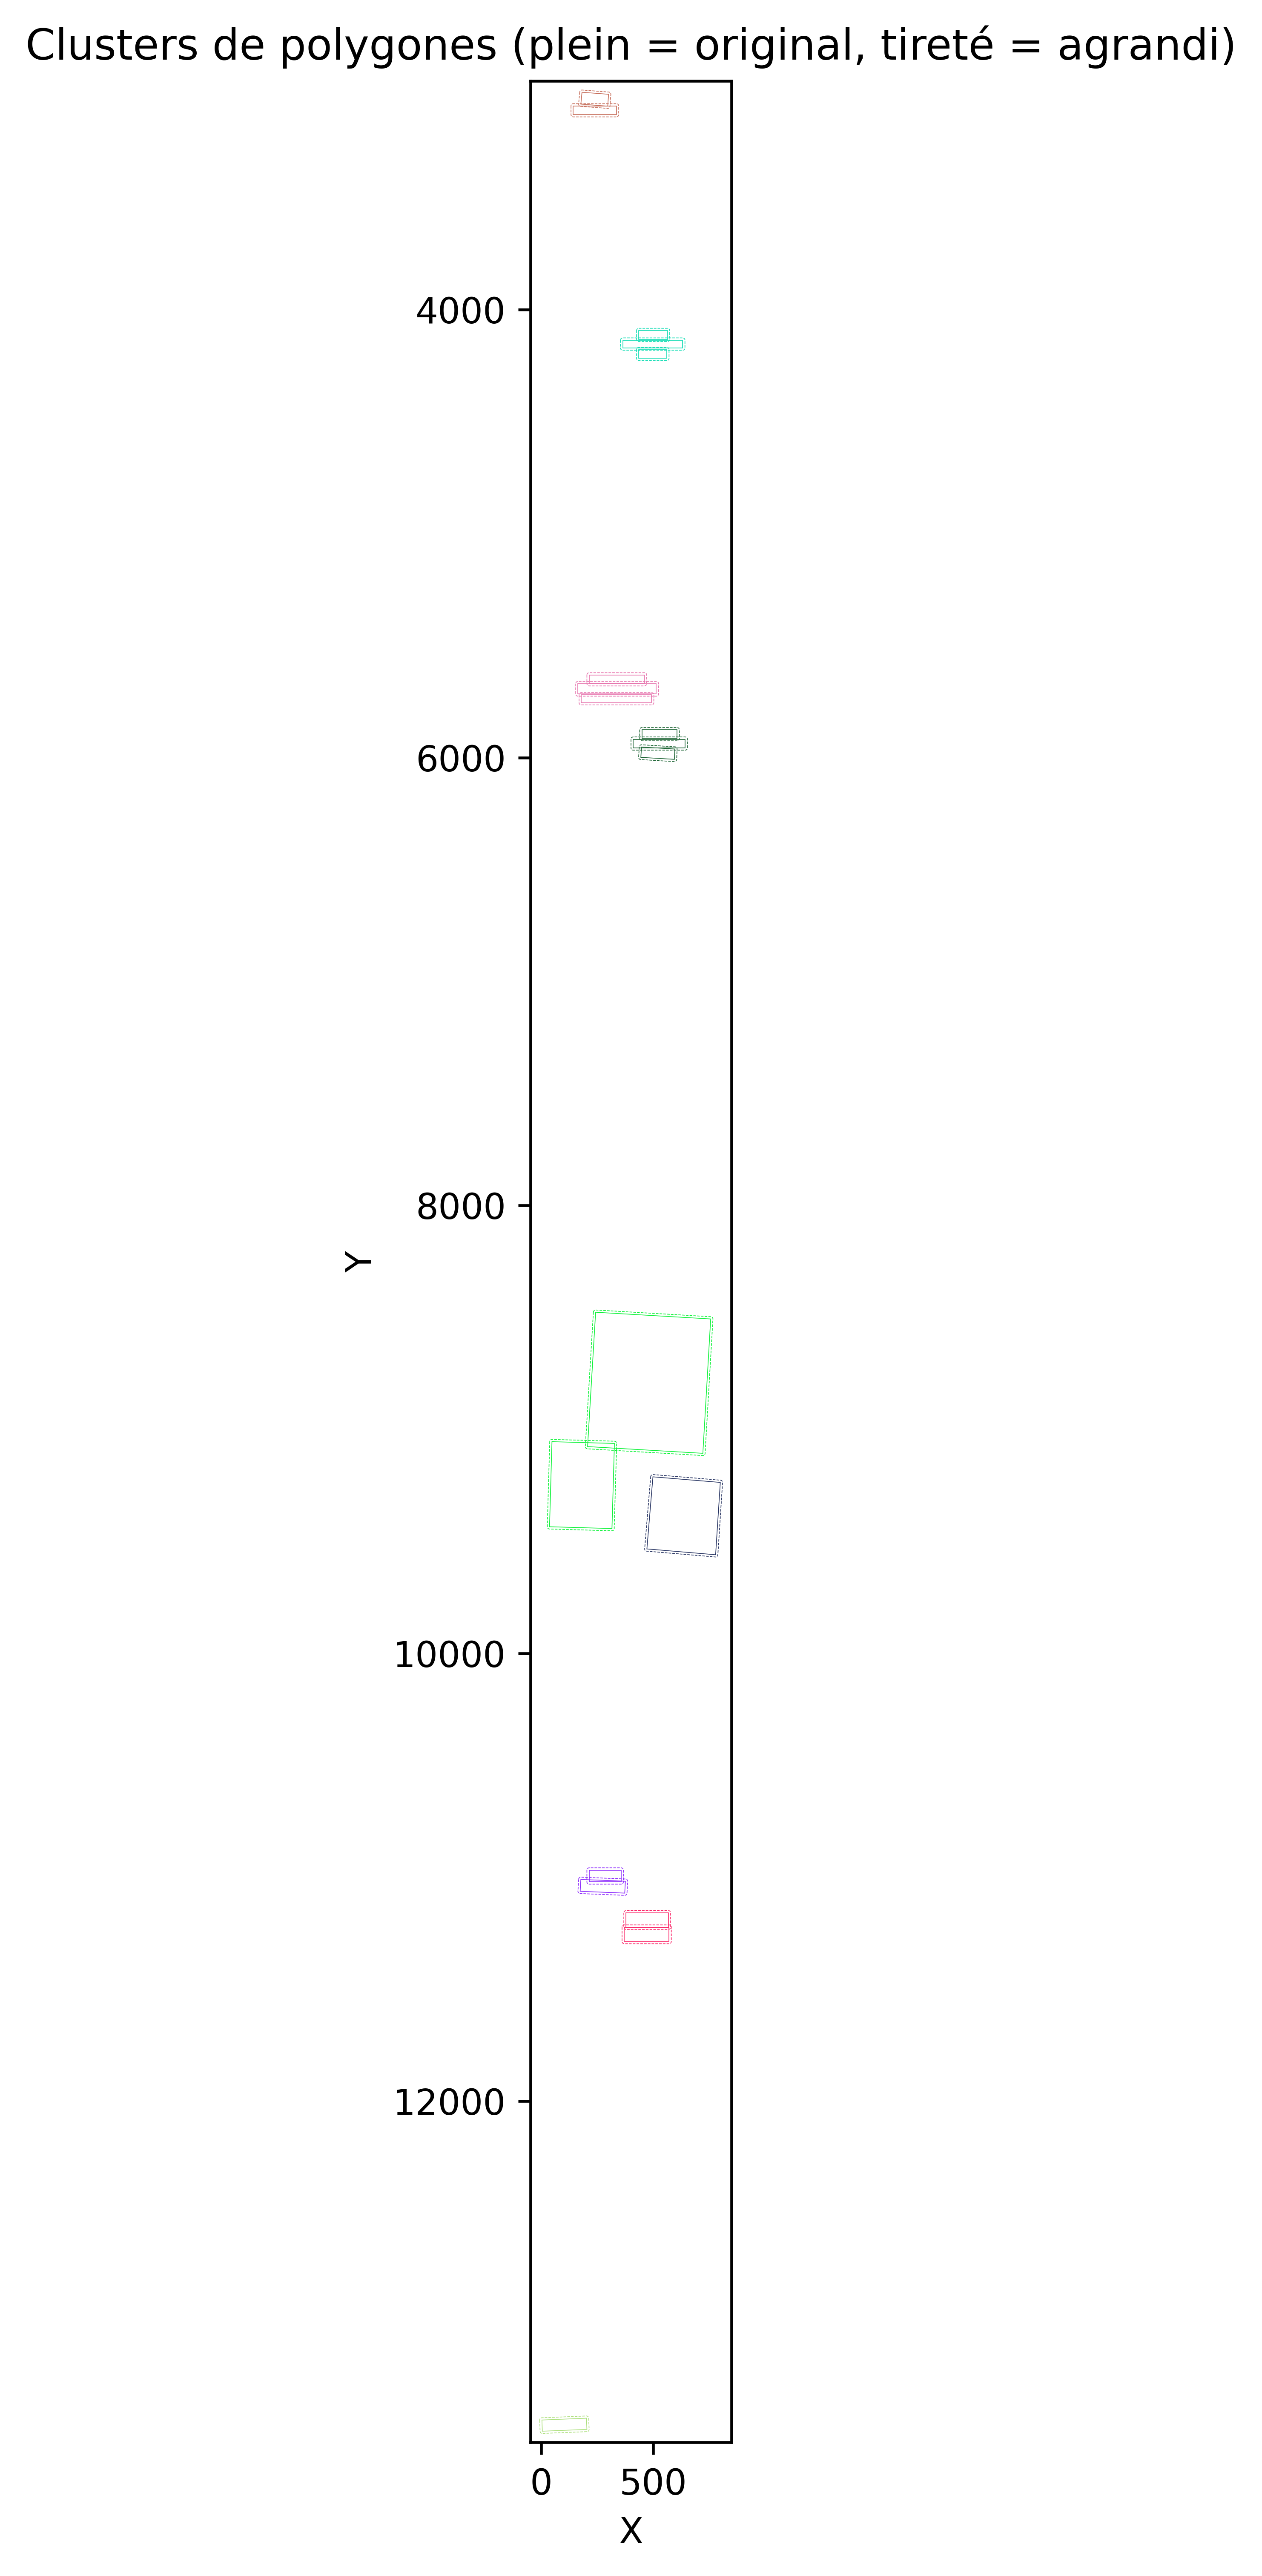

In [262]:
draw_clusters_polygons(result[0]["rec_polys"], margin=10, dpi=600, linewidth=0.2)